In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import matplotlib

In [3]:
# # np load tmp
# with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_acc.npy', 'rb') as fp:
#     running_acc = np.load(fp)
#
# with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_loss.npy', 'rb') as fp:
#     running_loss = np.load(fp)
#
# with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_curr_loss.npy', 'rb') as fp:
#     running_curr_loss = np.load(fp)
#
# # torch load tmp
# checkpoint = torch.load('../params/torch-vgg-cifar10.pth')
# running_acc = checkpoint['running_acc']
# running_loss = checkpoint['running_loss']
# running_curr_loss = checkpoint['running_curr_loss']

# plot tmp
# plt.figure(figsize=(10, 5))
# plt.plot(list(range(len(running_loss_relu))), running_loss_relu)
# plt.plot(list(range(len(running_loss_net))), running_loss_net)
# plt.plot(list(range(len(running_loss_ff))), running_loss_ff)
# plt.ylabel('Average loss in 10 iterations')
# plt.xlabel('Number of iterations / 10')
# plt.title('Average Loss vs. Number of Iterations\nBatch Size: 256')
# plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
# plt.savefig('avg_loss_batch_256_vgg_cifar10.jpg', dpi=300)
# plt.show()
#
# plt.figure(figsize=(10, 5))
# plt.plot(list(range(len(running_curr_loss_relu))), running_curr_loss_relu)
# plt.plot(list(range(len(running_curr_loss_net))), running_curr_loss_net)
# plt.plot(list(range(len(running_curr_loss_ff))), running_curr_loss_ff)
# plt.ylabel('Loss')
# plt.xlabel('Number of iterations')
# plt.title('Loss vs. Number of Iterations\nBatch Size: 256')
# plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
# plt.savefig('loss_batch_256_vgg_cifar10.jpg', dpi=300)
# plt.show()
#
# plt.figure(figsize=(10, 5))
# plt.plot(list(range(len(running_acc_relu))), running_acc_relu)
# plt.plot(list(range(len(running_acc_net))), running_acc_net)
# plt.plot(list(range(len(running_acc_ff))), running_acc_ff)
# plt.ylabel('Accuracy')
# plt.xlabel('Number of iterations')
# locs, labels = plt.xticks()
# plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
# plt.title('Accuracy vs. Number of Iterations\nBatch Size: 256')
# plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='lower right')
# plt.savefig('acc_batch_256_vgg_cifar10.jpg', dpi=300)
# plt.show()

In [57]:
def plot_loss_acc(clover_path, baseline_path, batch_size, dataset_name, title_dataset_name, ext):
    with open('{}/running_acc.npy'.format(clover_path), 'rb') as fp:
        running_acc_ff = np.load(fp)

    with open('{}/running_curr_loss.npy'.format(clover_path), 'rb') as fp:
        running_curr_loss_ff = np.load(fp)

    checkpoint = torch.load('{}'.format(baseline_path))
    running_acc_torch = checkpoint['running_acc']
    running_curr_loss_torch = checkpoint['running_curr_loss']

    matplotlib.rc('xtick', labelsize=23)
    matplotlib.rc('ytick', labelsize=23)
    plt.figure(figsize=(8, 7))
    plt.plot(list(range(len(running_curr_loss_torch))), running_curr_loss_torch, linewidth=4)
    plt.plot(list(range(len(running_curr_loss_ff))), running_curr_loss_ff, linewidth=4)
    plt.ylabel('Loss', fontweight='bold', fontsize=25)
    plt.xlabel('Number of iterations', fontweight='bold', fontsize=25)
    # plt.title('Loss vs. Number of Iterations\n{} - Batch Size: {}'.format(title_dataset_name, batch_size))
    plt.legend(['Baseline', 'CLOVER'], loc='upper right', prop={'size': 25, 'weight':'bold'})
    plt.savefig('loss_batch_{}_{}_{}.jpg'.format(batch_size, dataset_name, ext), dpi=300)
    plt.show()

    plt.figure(figsize=(8, 7))
    plt.plot(list(range(len(running_acc_torch))), [x.item() for x in running_acc_torch], linewidth=4)
    plt.plot(list(range(len(running_acc_ff))), running_acc_ff, linewidth=4)
    plt.ylabel('Accuracy', fontweight='bold', fontsize=25)
    plt.xlabel('Number of iterations', fontweight='bold', fontsize=25)
    locs, labels = plt.xticks()
    plt.xticks(locs[1:-1], [str(int(x * 10)) for x in locs[1:-1]])
    # plt.title('Accuracy vs. Number of Iterations\n{} - Batch Size: {}'.format(title_dataset_name, batch_size))
    plt.legend(['Baseline', 'CLOVER'], loc='lower right', prop={'size': 25, 'weight':'bold'})
    plt.savefig('acc_batch_{}_{}_{}.jpg'.format(batch_size, dataset_name, ext), dpi=300)
    plt.show()

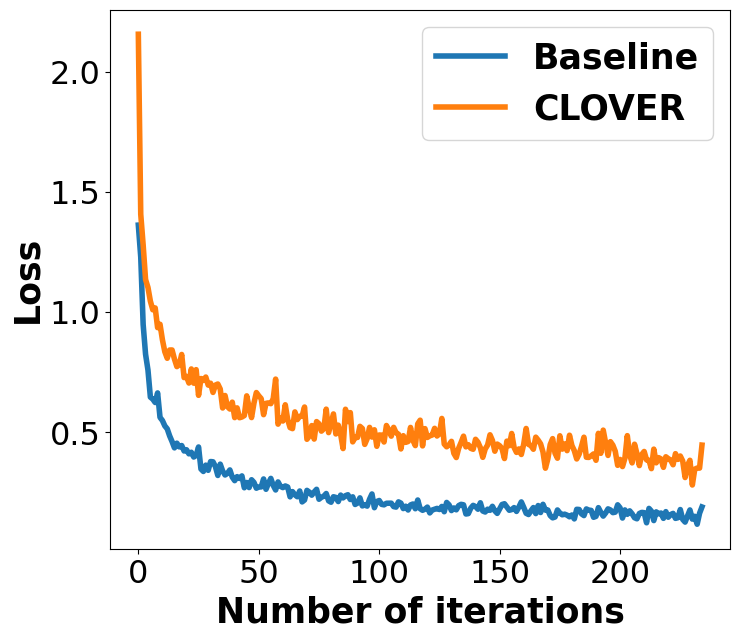

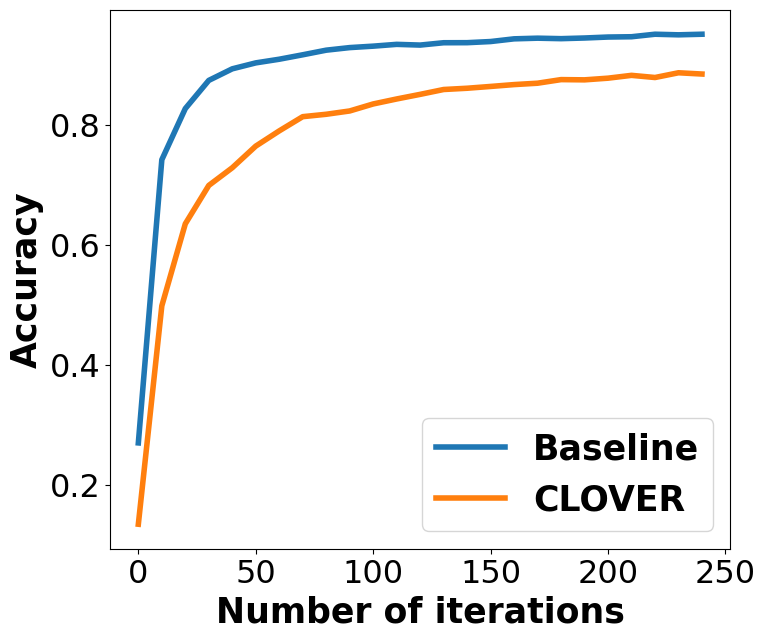

In [58]:
plot_loss_acc('../params/2023524-165641-mnist-ff-clover', '../params/torch-mnist-adam.pth', 256, 'mnist', 'MNIST', 'adam_clover')

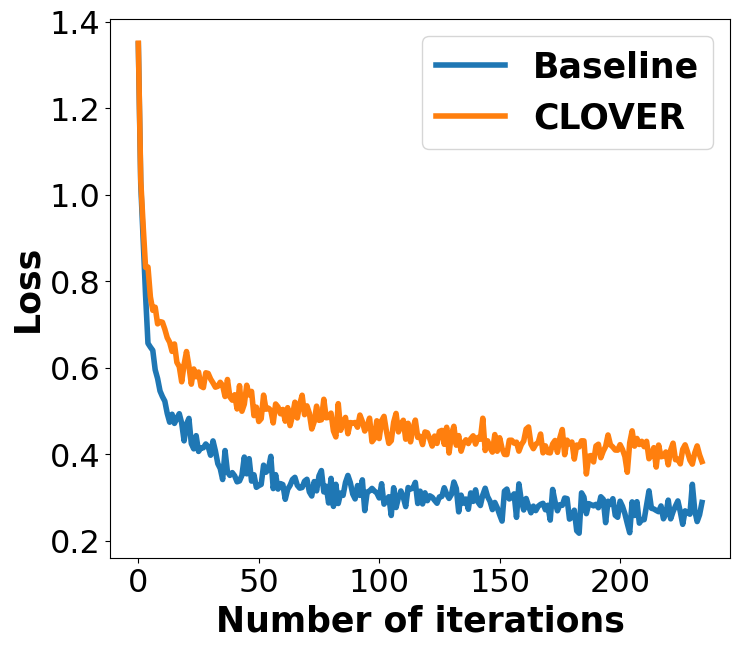

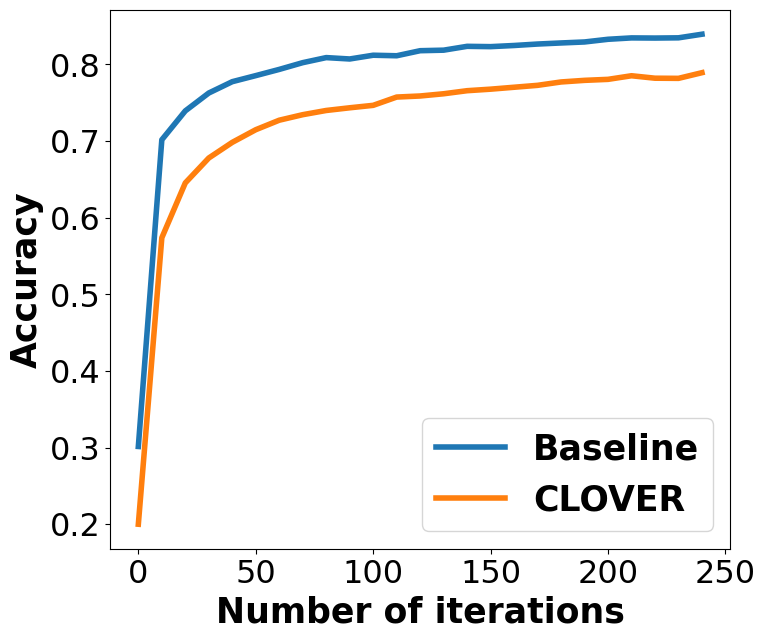

In [59]:
plot_loss_acc('../params/2023524-142234-fashion-mnist-ff-clover', '../params/torch-fashion-mnist-adam.pth', 256, 'fashion_mnist', 'Fashion MNIST', 'adam_clover')

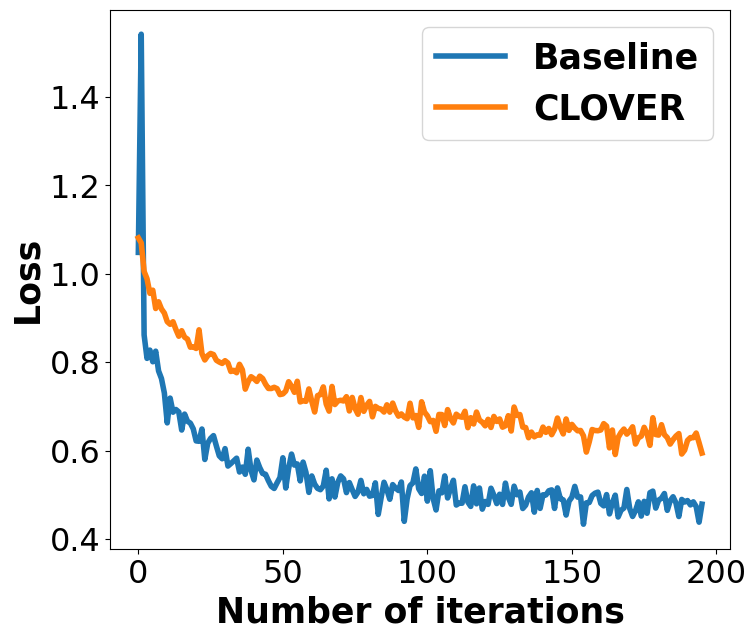

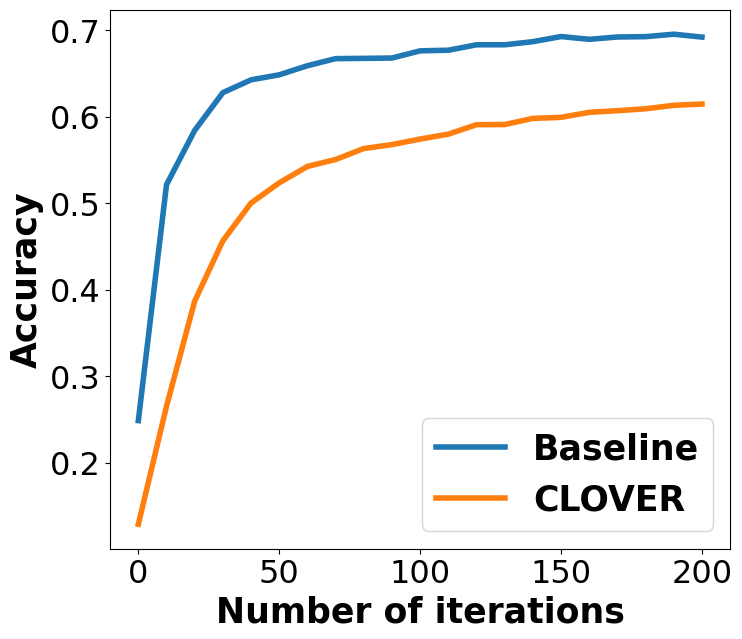

In [60]:
plot_loss_acc('../params/2023524-165946-cifar10-vgg-ff-clover', '../params/torch-vgg-cifar10-adam.pth', 256, 'cifar10', 'CIFAR10', 'adam_clover')